![title](https://image.shutterstock.com/image-vector/vector-illustration-bike-rental-brush-260nw-1522055711.jpg)

##### Capstone Project on

Analytical approach to study customer behaviour on renting bikes on daily basis.

##### Dataset Description:

The data set consists of 731 obsertvations recorded between the period of 2 years, from 2011 to 2012. It has 15 variables or predictors and 1 target variable. 

##### Attribute Description:

* **instant** - A unique sequential ID number for each row
* **dteday** - The date of the rentals
* **season** - the season in which the rentals occurred
* **yr** - The year the rentals occurred
* **mnth** - The month the rentals occurred
* **holiday** - Weather or not the day was a holiday
* **weekday** - Weather or not the day was a holiday 
* **workingday** - Weather or not the day was a working day
* **weathersit** - The Weather (as a categorical variable)
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp** - The temperature, on a 0-1 scale. The values are divided to 41 (max)
* **atemp** - The Adjusted temperature. The values are divided to 50 (max)
* **hum** - The humidity, on a 0-1 scale. The values are divided to 100 (max)
* **windspeed** - The Wind speed, on a 0-1 scale. The values are divided to 67 (max)
* **casual** - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* **registered** - The number of registered reiders(people who had already signed up)
* **cnt** - The total number of bike rentals(casual + registered)

##### Importing packages:

In [1]:
# General packages
import numpy as np
import pandas as pd

# We'll also import visualization lib.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import os

# Importing statistics lib.
import scipy.stats as sci

# importing ML lib.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

# Warning packages
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

##### Reading the data

As usual the first step is to read the available data and perform some high-level analysis on it

In [2]:
# Next, we'll load the Daily dataset, which is in the "../input/" directory
df_master = pd.read_csv(r'C:\Users\ykr47\Downloads\day.csv')
df = df_master.copy() # creating another copy of master source.

##### Lets get to know our Data

Beginning this project we are going to focus on the data. This dataset contains total bike rentals on daily basis. Let's see the first 5 rowns.

In [3]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB


##### Data Preprocessing

In [5]:
df = df.rename(columns = {'dteday':'date','yr': 'year', 'mnth':'month','hum':'humidity', 'cnt':'count'})
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [9]:
df["year"].unique()

array([0, 1], dtype=int64)

In [10]:
df["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [11]:
# Mapping categorical variable numeric values to Text.

seasons = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weathers = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow or Rain'}
weekday = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6:'Sun'}
years = {0: '2011', 1: '2012'}
months = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}



df['season'] = df['season'].map(seasons)
df['weathersit'] =df['weathersit'].map(weathers)
df['weekday'] = df['weekday'].map(weekday)
df['year'] = df['year'].map(years)
df['month'] = df['month'].map(months)

df['holiday'] = np.where(df['holiday']==1, 'Holiday', 'No Holiday')
df['workingday'] = np.where(df['workingday']==1, 'Working Day', 'No Working Day')



df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,No Holiday,Sun,No Working Day,Misty+Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No Holiday,Mon,No Working Day,Misty+Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No Holiday,Tue,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No Holiday,Wed,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No Holiday,Thu,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# Convert temperature to celsius format
df['temp'] = round(df['temp'].apply(lambda x: x*41),2)

In [13]:
df['atemp'] = round(df['atemp'].apply(lambda x: x*50),2)

In [14]:
df.head(5)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,No Holiday,Sun,No Working Day,Misty+Cloudy,14.11,18.18,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No Holiday,Mon,No Working Day,Misty+Cloudy,14.90,17.69,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No Holiday,Tue,Working Day,Clear,8.05,9.47,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No Holiday,Wed,Working Day,Clear,8.20,10.61,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No Holiday,Thu,Working Day,Clear,9.31,11.46,0.436957,0.186900,82,1518,1600


In [15]:
df['date'] = pd.to_datetime(df['date'],yearfirst=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
# Seperating all categorical and continous data.
df_conti_vars = df.loc[:, (df.dtypes == 'float64') | (df.dtypes =='int64')]
df_cat_vars = df.loc[:, df.dtypes == 'object']

In [18]:
# Printing all the categorical data.
df_cat_vars.head()

,season,year,month,holiday,weekday,workingday,weathersit
0,Spring,2011,Jan,No Holiday,Sun,No Working Day,Misty+Cloudy
1,Spring,2011,Jan,No Holiday,Mon,No Working Day,Misty+Cloudy
2,Spring,2011,Jan,No Holiday,Tue,Working Day,Clear
3,Spring,2011,Jan,No Holiday,Wed,Working Day,Clear
4,Spring,2011,Jan,No Holiday,Thu,Working Day,Clear


In [19]:
# Printing all the numerical data.
df_conti_vars

,instant,temp,atemp,humidity,windspeed,casual,registered,count
0,1,14.11,18.18,0.805833,0.160446,331,654,985
1,2,14.90,17.69,0.696087,0.248539,131,670,801
2,3,8.05,9.47,0.437273,0.248309,120,1229,1349
3,4,8.20,10.61,0.590435,0.160296,108,1454,1562
4,5,9.31,11.46,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...
726,727,10.42,11.33,0.652917,0.350133,247,1867,2114
727,728,10.39,12.75,0.590000,0.155471,644,2451,3095
728,729,10.39,12.12,0.752917,0.124383,159,1182,1341
729,730,10.49,11.58,0.483333,0.350754,364,1432,1796


In [20]:
# UDF to get descriptive stats summary for continous variable.
def numerical_variable_summary(x):
    return pd.Series([x.count(), x.sum(), x.min(), x.median(), 
                     x.std(), x.var(), x.quantile(.25), x.quantile(.50), 
                     x.quantile(0.75), x.max(), x.skew(), x.kurtosis()], 
                    index = ['N', 'SUM', 'MIN', 'MEDIAN', 'STD', 
                    'VAR', 'P25', 'P50', 'P75', 'MAX', 'SKEWNESS', 'KURTOSIS'])

In [21]:
df_conti_vars.apply(numerical_variable_summary).round(2)

,instant,temp,atemp,humidity,windspeed,casual,registered,count
N,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
SUM,267546.00,14847.21,17337.70,458.99,139.25,620017.00,2672662.00,3292679.00
MIN,1.00,2.42,3.95,0.00,0.02,2.00,20.00,22.00
MEDIAN,366.00,20.43,24.34,0.63,0.18,713.00,3662.00,4548.00
STD,211.17,7.51,8.15,0.14,0.08,686.62,1560.26,1937.21
VAR,44591.00,56.33,66.39,0.02,0.01,471450.44,2434399.96,3752788.21
P25,183.50,13.82,16.90,0.52,0.13,315.50,2497.00,3152.00
P50,366.00,20.43,24.34,0.63,0.18,713.00,3662.00,4548.00
P75,548.50,26.88,30.43,0.73,0.23,1096.00,4776.50,5956.00
MAX,731.00,35.33,42.04,0.97,0.51,3410.00,6946.00,8714.00


In [22]:
# UDF to get descriptive stats summary for categorical variable.
def categorical_variable_summary(x):
    Mode = x.value_counts().reset_index()
    return pd.Series([x.count(), Mode.iloc[0, 0], Mode.iloc[0,1], 
                    (Mode.iloc[0,1]*100)/x.count()], 
                    index = ['N', 'Mode', 'FREQ', 'PERC'])

In [23]:
df_cat_vars.apply(categorical_variable_summary).T.round(2)

,N,Mode,FREQ,PERC
season,731,Fall,188,25.7182
year,731,2012,366,50.0684
month,731,Jan,62,8.48153
holiday,731,No Holiday,710,97.1272
weekday,731,Tue,105,14.3639
workingday,731,Working Day,500,68.3995
weathersit,731,Clear,463,63.3379


##### Exploratory Data Analysis

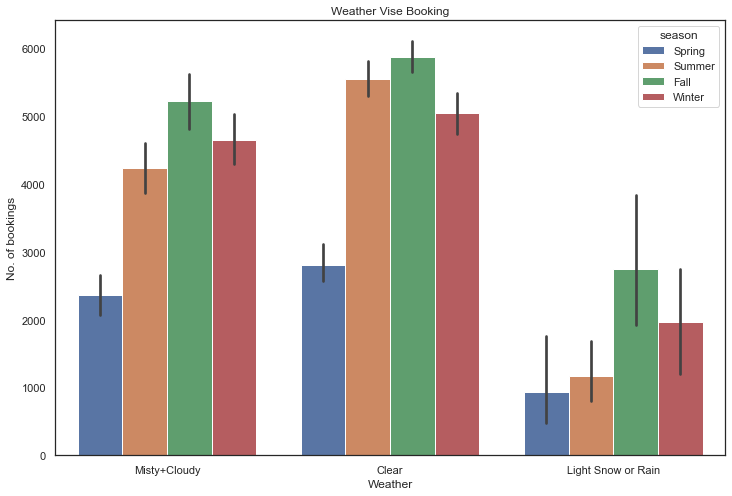

In [24]:
#------------Weather Vise Booking-----------------------
plt.figure(figsize=(12,8))
sns.barplot(x='weathersit', y='count', data=df, hue="season")
plt.title('Weather Vise Booking')
plt.ylabel('No. of bookings')
plt.xlabel('Weather');

We see clearly here that Clear weather are the most preferred for bike rentals.

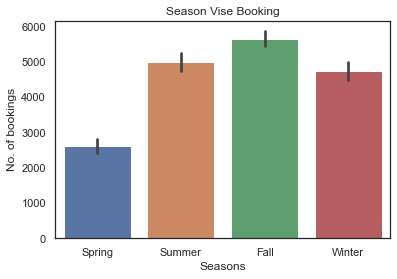

In [25]:
#------------Season Vise Booking-----------------------
sns.barplot(x='season', y='count', data=df)
plt.title('Season Vise Booking')
plt.ylabel('No. of bookings')
plt.xlabel('Seasons');

We see clearly here that Summer and Fall/Autumn are the most preferred seasons for bike rentals.

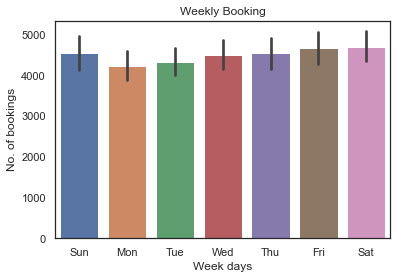

In [26]:
#------------Weekly Booking-----------------------
sns.barplot(x='weekday', y='count', data=df)
plt.title('Weekly Booking')
plt.ylabel('No. of bookings')
plt.xlabel('Week days');

We see clearly here that sunday and saturday has more no. of bookings.

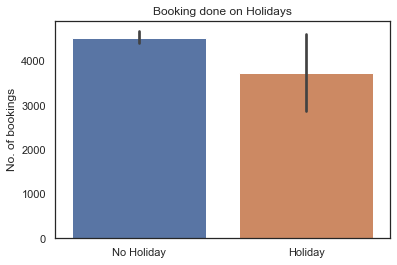

In [27]:
#------------Booking done on Holidays-----------------------
sns.barplot(x='holiday', y='count', data=df)
plt.title('Booking done on Holidays')
plt.ylabel('No. of bookings')
plt.xlabel('');

We see clearly here that on regular days we have more bookings.

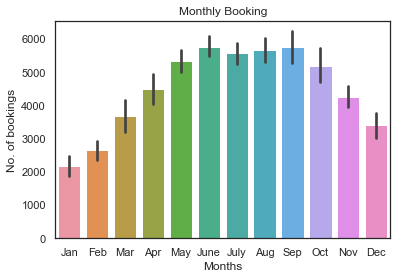

In [28]:
#------------Monthly Booking-----------------------
sns.barplot(x='month', y='count', data=df)
plt.title('Monthly Booking')
plt.ylabel('No. of bookings')
plt.xlabel('Months');

We see clearly here that June, July and august  has more no. of bookings.

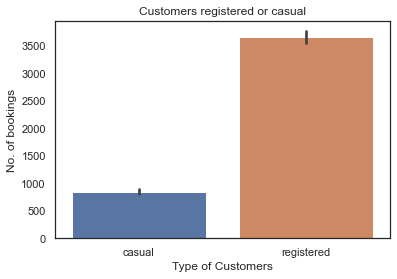

In [29]:
#------------Customers registered or casual-----------------------
melted = pd.melt(df, value_vars=['casual','registered'])
sns.barplot(x='variable', y='value', data=melted)
plt.title('Customers registered or casual')
plt.ylabel('No. of bookings')
plt.xlabel('Type of Customers');

So, there sre some plople who are not regestering but they are booking as guest.

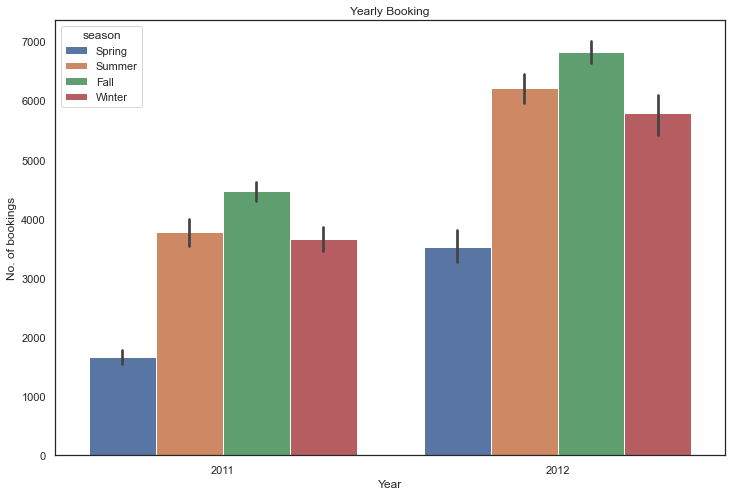

In [30]:
#------------Yearly Booking-----------------------
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='count', data=df, hue= 'season')
plt.title('Yearly Booking')
plt.ylabel('No. of bookings')
plt.xlabel('Year');

There is increase in sales of company almost by 20%.

##### Correlation matrix:-

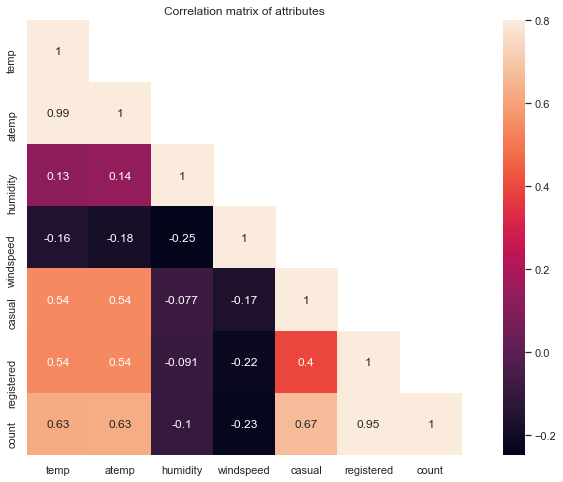

Wall time: 379 ms


In [31]:
%%time
#Create the correlation matrix:-
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes:-
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

**Observation:-** From correlation plot, we can observe that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

##### Feature Scaling:-

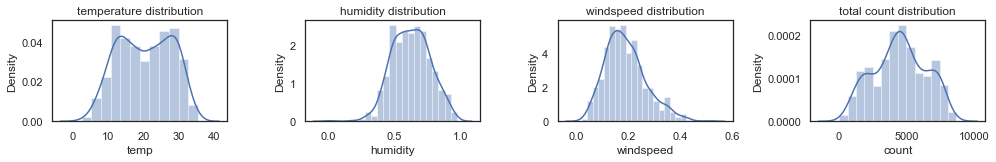

In [32]:
#Scaling for Continious variable :-
plt.figure(figsize=(14,4))

plt.subplot(2,4,1)
sns.distplot(df['temp'])
plt.title('temperature distribution')

plt.subplot(2,4,2)
sns.distplot(df['humidity'])
plt.title('humidity distribution')

plt.subplot(2,4,3)
sns.distplot(df['windspeed'])
plt.title('windspeed distribution')

plt.subplot(2,4,4)
sns.distplot(df['count'])
plt.title('total count distribution')

plt.tight_layout()

##### Rollback understandable text to numbers 

In [33]:
# Rollback understandable text to numbers 
season_dict = { 'Spring' :'1', 'Summer' :'2', 'Fall' : '3', 'Winter' : '4'}
weather_dict = { 'Clear' :'1', 'Misty+Cloudy' : '2', 'Light Snow or Rain' : '3'}
month_dict = {'Jan' : '1', 'Feb' : '2', 'Mar' :'3', 'Apr' : '4', 'May' : '5', 'June' :'6', 'July' : '7', 'Aug' : '8', 'Sep' : '9', 'Oct' : '10', 'Nov' : '11', 'Dec' :'12'}
year_dict = { '2011' : '0', '2012' : '1'}
workingday_dict = {'Working Day':'1', 'No Working Day': '0'}
holiday_dict = {'Holiday':'1', 'No Holiday': '0'}
weekday_dict = {'Mon' : 0, 'Tue' : 1, 'Wed' : 2 , 'Thu' : 3, 'Fri' : 4, 'Sat' : 5, 'Sun' : 6}


df['season'] = df['season'].map(season_dict)
df['weathersit'] = df['weathersit'].map(weather_dict)
df['month'] = df['month'].map(month_dict)
df['year'] = df['year'].map(year_dict)
df['workingday'] = df['workingday'].map(workingday_dict)
df['holiday'] = df['holiday'].map(holiday_dict)
df['weekday'] = df['weekday'].map(weekday_dict)
df['weekday'].round(decimals=0)

df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,0.436957,0.186900,82,1518,1600


##### MODEL BUILDING

    3 stages of model building

##### Function for Train Test Split

In [34]:
X=df_conti_vars.drop(columns=['count'])
y=df_conti_vars['count']

##### Function for Model Building

In [35]:
#Split the dataset into train and test in the ratio of 70:30:-

#Split the dataset into the train and test data:-
X_train,X_test,y_train,y_test=train_test_split(df_conti_vars.iloc[:,0:-3],df_conti_vars.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values:-
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values:-
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 6) (220, 6) (511, 2) (220, 2)
   index  count
0    223   4905
1    684   5445
2    685   5698
3    163   5020
4    394   3624
   index  count
0    703   6606
1     33   1550
2    300   3747
3    456   6041
4    633   7538


##### LinearRegression:-

In [36]:
#Training model:-
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [37]:
%%time
#fit the trained model:-
lr_model.fit(X_train,y_train)

Wall time: 7.98 ms


LinearRegression()

In [38]:
#Accuracy of the model:-
lr=lr_model.score(X_test,y_test)
print('Accuracy of the model :',lr)

Accuracy of the model : 0.8662219785927608


In [39]:
#R squared score:-
r2_scores=cross_val_score(lr_model,X_test,y_test,cv=3)
print('R squared score:',np.average(r2_scores))

R squared score: 0.8588744922765389


##### Decision tree regressor:-

In [40]:
#Training the model:-
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [41]:
#Fit the trained model:-
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [42]:
#Accuracy score of the model
dtr_score=dtr.score(X_test,y_test)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8405221411435366


In [43]:
#R squared score:-
r2_scores=cross_val_score(dtr,X_test,y_test,cv=3)
print('R squared score:',np.average(r2_scores))

R squared score: 0.8038748966384421


##### Random Forest:-

In [44]:
#Training the model:-
rf=RandomForestRegressor(n_estimators=200)

In [45]:
%%time
#Fit the trained model:-
rf.fit(X_train,y_train)

Wall time: 582 ms


RandomForestRegressor(n_estimators=200)

In [46]:
#Random Forest accuracy score:-
rf_score=rf.score(X_test,y_test)
rf_score

0.9331532614810899

In [47]:
#R squared score:-
r2_scores=cross_val_score(rf,X_test,y_test,cv=3)
print('R squared score:',np.average(r2_scores))

R squared score: 0.9078400340478515
